In [172]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [173]:
#Loading the dataset
test = pd.read_csv('data/client_attrition_test.csv')
train = pd.read_csv('data/client_attrition_train.csv')

In [174]:
#Print the first 5 rows of the dataframe.
test.head()

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization
0,699849,45.0,M,2,College,Married,Unknown,39,32305.283754,Blue,1,2,1,1616,30689.223984,0.734434,7129.0,84,0.622710,0.053034
1,268360,49.0,M,2,High School,Married,60-80K,39,6034.217130,Blue,4,1,2,472,5562.147684,0.601163,2449.0,54,0.755622,0.050136
2,274908,52.0,F,2,Uneducated,Married,below 40K,35,1922.816349,Blue,2,1,2,1003,919.282441,0.710107,33472.0,77,0.853080,0.526542
3,877343,44.0,F,1,Graduate,Married,below 40K,39,3117.457937,Blue,6,1,2,1385,1732.406928,0.706558,4606.0,77,0.535171,0.468406
4,634148,47.0,M,2,Graduate,Married,below 40K,30,23466.755802,Blue,6,2,2,1692,21773.897252,0.741078,3603.0,71,0.735060,0.071246


In [175]:
#Print the first 20 rows of the dataframe.
train.head(20)

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,...,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,755410,38.0,F,2,High School,Married,40-60K,31,1593.0,Blue,...,2,4,1091,502.0,0.870,4136.0,67,0.718,0.685,open
1,568093,46.0,F,2,Graduate,Unknown,below 40K,40,6568.0,Blue,...,2,2,0,6568.0,0.101,1507.0,33,0.222,0.000,closed
2,595389,43.0,M,1,High School,Married,80-120K,30,34516.0,Silver,...,1,3,2045,32471.0,0.590,4081.0,54,0.421,0.059,open
3,287252,46.0,F,4,High School,Married,below 40K,36,2374.0,Blue,...,2,1,1332,1042.0,0.686,4253.0,81,0.884,0.561,open
4,231901,40.0,M,4,High School,Single,80-120K,29,12978.0,Blue,...,3,2,0,12978.0,0.628,14134.0,85,0.700,0.000,open
5,418821,51.0,M,4,High School,Married,80-120K,42,14438.0,Blue,...,1,2,2517,11921.0,0.853,2090.0,47,0.880,0.174,open
6,896187,45.0,F,3,Uneducated,Single,below 40K,39,2551.0,Blue,...,4,1,2253,298.0,0.688,NaN,63,0.909,0.883,open
7,258495,50.0,F,1,High School,Single,below 40K,36,4517.0,Blue,...,1,3,2238,2279.0,0.625,4686.0,81,0.761,0.495,open
8,881720,45.0,F,5,Unknown,Married,Unknown,40,14728.0,Blue,...,2,2,0,14728.0,0.708,4660.0,85,0.735,0.000,open
9,367251,40.0,F,2,Graduate,Unknown,below 40K,29,2636.0,Blue,...,1,2,1953,683.0,0.916,4584.0,70,0.591,0.741,open


In [176]:
## gives information about the data types,columns, null value counts, memory usage etc
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      10127 non-null  int64  
 1   customer_age                     9503 non-null   float64
 2   customer_sex                     9109 non-null   object 
 3   customer_number_of_dependents    10127 non-null  int64  
 4   customer_education               10127 non-null  object 
 5   customer_civil_status            10127 non-null  object 
 6   customer_salary_range            9446 non-null   object 
 7   customer_relationship_length     10127 non-null  int64  
 8   customer_available_credit_limit  10127 non-null  float64
 9   credit_card_classification       10127 non-null  object 
 10  total_products                   10127 non-null  int64  
 11  period_inactive                  10127 non-null  int64  
 12  contacts_in_last_y

In [177]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10127.0,550508.987854,261237.656234,100069.0,323605.000,552548.000,777326.000,999911.000
customer_age,9503.0,46.317900,8.001227,26.0,41.000,46.000,52.000,73.000
customer_number_of_dependents,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
customer_relationship_length,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
customer_available_credit_limit,10127.0,10036.343784,17629.707395,1438.3,2578.500,4696.000,11767.500,310644.000
total_products,10127.0,4.147329,3.183477,1.0,3.000,4.000,5.000,36.000
period_inactive,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
contacts_in_last_year,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
credit_card_debt_balance,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
remaining_credit_limit,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000


In [178]:
print(test.isnull().sum())

customer_id                          0
customer_age                       294
customer_sex                       472
customer_number_of_dependents        0
customer_education                   0
customer_civil_status                0
customer_salary_range              331
customer_relationship_length         0
customer_available_credit_limit      0
credit_card_classification           0
total_products                       0
period_inactive                      0
contacts_in_last_year                0
credit_card_debt_balance             0
remaining_credit_limit               0
transaction_amount_ratio             0
total_transaction_amount           186
total_transaction_count              0
transaction_count_ratio              0
average_utilization                  0
dtype: int64


In [179]:
print(train.isnull().sum())

customer_id                           0
customer_age                        624
customer_sex                       1018
customer_number_of_dependents         0
customer_education                    0
customer_civil_status                 0
customer_salary_range               681
customer_relationship_length          0
customer_available_credit_limit       0
credit_card_classification            0
total_products                        0
period_inactive                       0
contacts_in_last_year                 0
credit_card_debt_balance              0
remaining_credit_limit                0
transaction_amount_ratio              0
total_transaction_amount            407
total_transaction_count               0
transaction_count_ratio               0
average_utilization                   0
account_status                        0
dtype: int64


## Time for NA's handling

#####  For continuous: statistics like mean/median/mode or random value from assumed distribution
#####  For categorical: replace with mode or replace randomly from non-missing

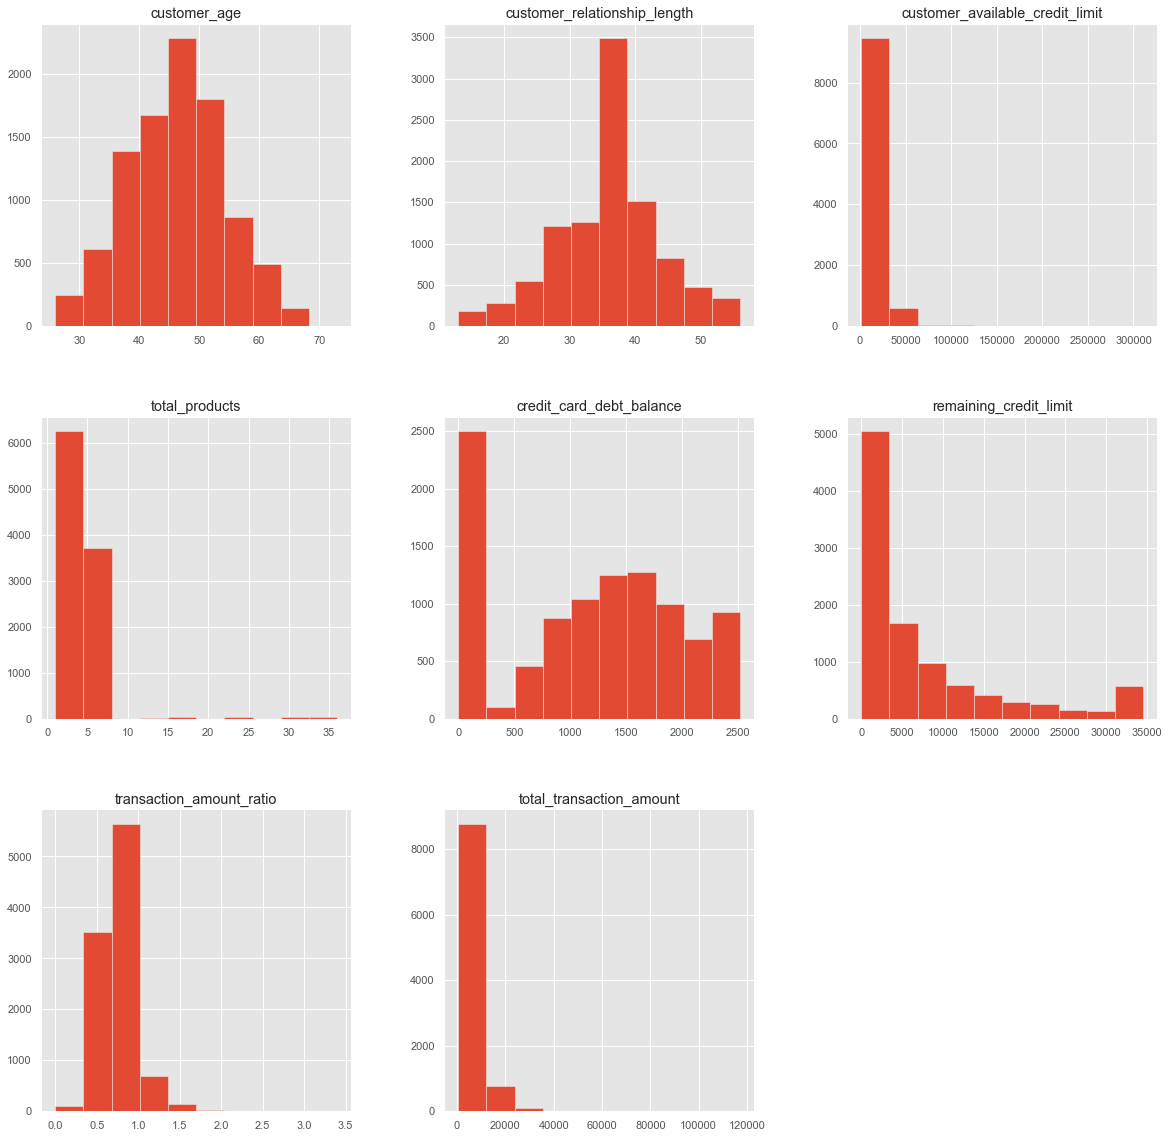

In [180]:
train_hist = train[['customer_age','customer_relationship_length', 'customer_available_credit_limit', 'credit_card_classification', 'total_products', 'credit_card_debt_balance','remaining_credit_limit' ,'transaction_amount_ratio','total_transaction_amount', "customer_salary_range"]]

p = train_hist.hist(figsize = (20,20))

1) customer_age

In [181]:
# Identify missing values in customer_age
train_missing_age = train['customer_age'].isnull()
test_missing_age = test['customer_age'].isnull()

# Impute random values for train dataset
train.loc[train_missing_age, 'customer_age'] = np.random.uniform(26, 73, train_missing_age.sum()).astype(int)

# Impute random values for test dataset
test.loc[test_missing_age, 'customer_age'] = np.random.uniform(26, 73, test_missing_age.sum()).astype(int)

2. customer_sex

In [182]:
train.loc[train['customer_sex'] == 'M', 'customer_sex'] = 0
train.loc[train['customer_sex'] == 'F', 'customer_sex'] = 1

test.loc[test['customer_sex'] == 'M', 'customer_sex'] = 0
test.loc[test['customer_sex'] == 'F', 'customer_sex'] = 1

# Generate random values of 0 and 1
random_sex_tain = np.random.choice([0, 1], size=train['customer_sex'].isnull().sum())
random_sex_test = np.random.choice([0, 1], size=test['customer_sex'].isnull().sum())

# Assign the random values to the missing values
train.loc[train['customer_sex'].isnull(), 'customer_sex'] = random_sex_tain
test.loc[test['customer_sex'].isnull(), 'customer_sex'] = random_sex_test

train['customer_sex'] = train['customer_sex'].astype(int)
test['customer_sex'] = test['customer_sex'].astype(int)


3. customer_salary_range

In [183]:
# Define the mapping dictionary for category transformation
salary_mapping = {'below 40K': 1, '40-60K': 2, '60-80K': 3, '80-120K': 4, '120K and more': 5}

# Map the salary ranges to categories
train['customer_salary_range'] = train['customer_salary_range'].map(salary_mapping)
test['customer_salary_range'] = test['customer_salary_range'].map(salary_mapping)


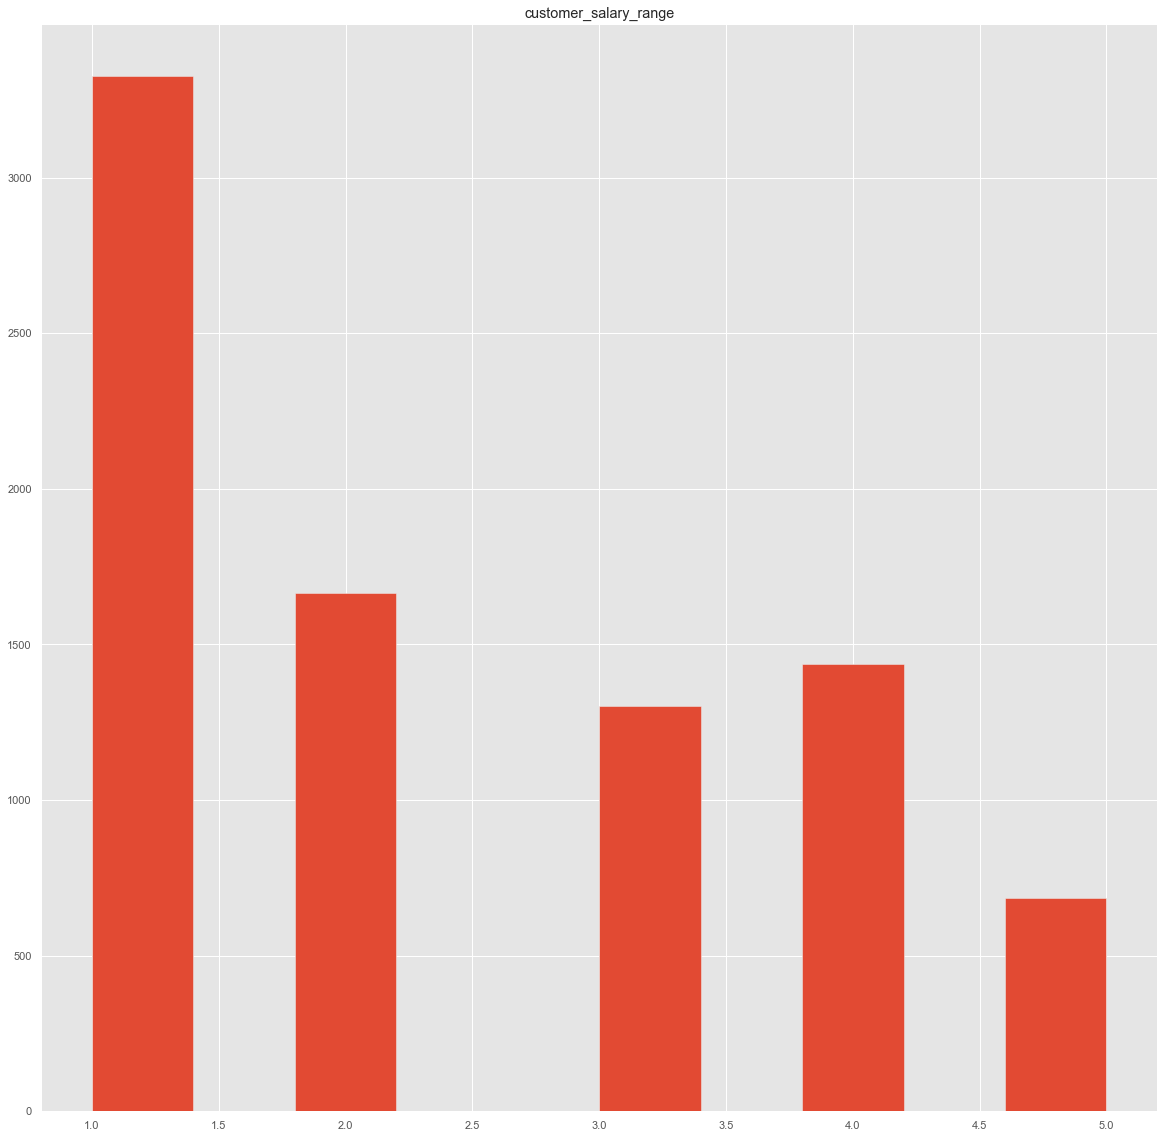

In [184]:
train_sal = train[["customer_salary_range"]]

p = train_sal.hist(figsize = (20,20))

In [185]:
# Identify the missing values ('NaN' and 'unknown')
missing_salary_train = train['customer_salary_range'].isnull()
missing_salary_test = test['customer_salary_range'].isnull()
print(missing_salary_train.unique)


<bound method Series.unique of 0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123     True
10124    False
10125    False
10126    False
Name: customer_salary_range, Length: 10127, dtype: bool>


In [186]:
# Generate random values for the missing values
random_salary_train = np.random.choice(range(1, 6), size=missing_salary_train.sum())
random_salary_test = np.random.choice(range(1, 6), size=missing_salary_test.sum())

# Assign the random values to the missing values
train.loc[missing_salary_train, 'customer_salary_range'] = random_salary_train
test.loc[missing_salary_test, 'customer_salary_range'] = random_salary_test

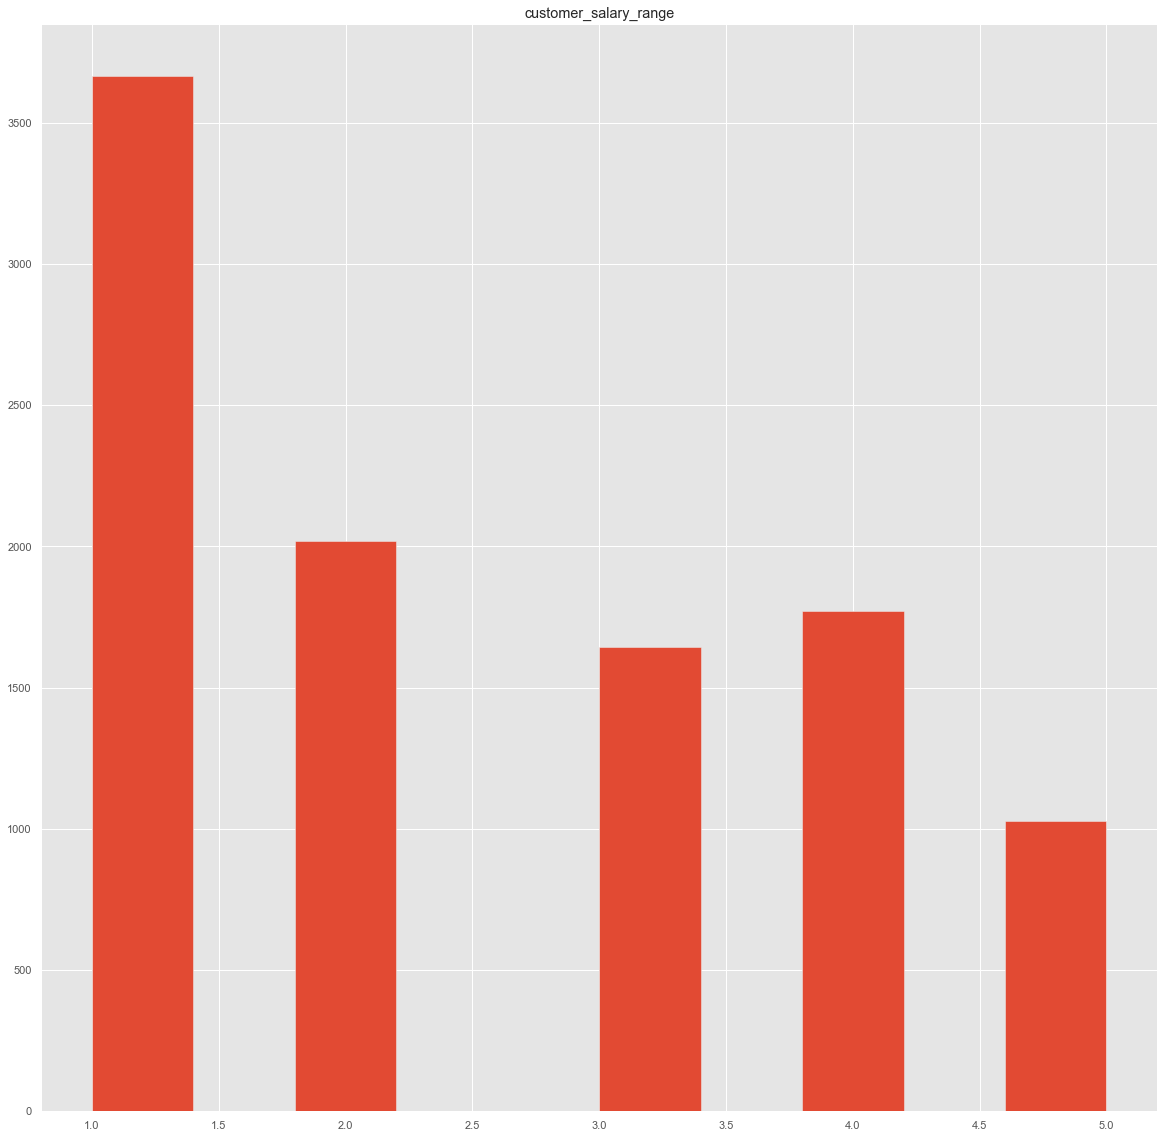

In [187]:
train_sal = train[["customer_salary_range"]]

p = train_sal.hist(figsize = (20,20))

4. total_transaction_amount

In [188]:
# Calculate the mode of the existing values
mode_value = train['total_transaction_amount'].mode()[0]
mode_value = test['total_transaction_amount'].mode()[0]

# Replace the missing values with the mode
train['total_transaction_amount'] = train['total_transaction_amount'].fillna(mode_value)
test['total_transaction_amount'] = test['total_transaction_amount'].fillna(mode_value)


5. customer_education

In [189]:
# Define the mapping dictionary for category transformation
edu_mapping = {'Uneducated': 1,'High School': 2, 'Graduate': 3, 'College': 4}

# Map the salary ranges to categories, replacing 'unknown' with NaN
train['customer_education'] = train['customer_education'].replace('Unknown', np.nan).map(edu_mapping)
test['customer_education'] = test['customer_education'].replace('Unknown', np.nan).map(edu_mapping)

# Identify the missing values ('NaN' and 'unknown')
missing_edu_train = train['customer_education'].isnull()
missing_edu_test = test['customer_education'].isnull()

# Generate random values for the missing values
random_edu_train = np.random.choice(range(1, 5), size=missing_edu_train.sum())
random_edu_test = np.random.choice(range(1, 5), size=missing_edu_test.sum())

# Assign the random values to the missing values
train.loc[missing_edu_train, 'customer_education'] = random_edu_train
test.loc[missing_edu_test, 'customer_education'] = random_edu_test

6. customer_civil_status

In [190]:
# Define the mapping dictionary for category transformation
civil_mapping = {'Divorced': 1,'Single': 2, 'Married': 3}

# Map the ranges to categories, replacing 'unknown' with NaN
train['customer_civil_status'] = train['customer_civil_status'].replace('Unknown', np.nan).map(civil_mapping)
test['customer_civil_status'] = test['customer_civil_status'].replace('Unknown', np.nan).map(civil_mapping)

# Identify the missing values ('NaN' and 'unknown')
missing_civil_train = train['customer_civil_status'].isnull()
missing_civil_test = test['customer_civil_status'].isnull()

# Generate random values for the missing values
random_civil_train = np.random.choice(range(1, 4), size=missing_civil_train.sum())
random_civil_test = np.random.choice(range(1, 4), size=missing_civil_test.sum())

# Assign the random values to the missing values
train.loc[missing_civil_train, 'customer_civil_status'] = random_civil_train
test.loc[missing_civil_test, 'customer_civil_status'] = random_civil_test

7. credit_card_classification

In [191]:
# Define the mapping dictionary for category transformation
card_mapping = {'Blue': 1,'Silver': 2, 'Gold': 3, 'Platinum': 4}

# Map the ranges to categories, replacing 'unknown' with NaN
train['credit_card_classification'] = train['credit_card_classification'].replace('Unknown', np.nan).map(card_mapping)
test['credit_card_classification'] = test['credit_card_classification'].replace('Unknown', np.nan).map(card_mapping)

# Identify the missing values ('NaN' and 'unknown')
missing_card_train = train['credit_card_classification'].isnull()
missing_card_test = test['credit_card_classification'].isnull()

# Generate random values for the missing values
random_card_train = np.random.choice(range(1, 4), size=missing_card_train.sum())
random_card_test = np.random.choice(range(1, 4), size=missing_card_test.sum())

# Assign the random values to the missing values
train.loc[missing_card_train, 'credit_card_classification'] = random_card_train
test.loc[missing_card_test, 'credit_card_classification'] = random_card_test

In [192]:
# Define the mapping dictionary for category transformation
status_mapping = {'open': 0,'closed': 1}

# Map categories
train['account_status'] = train['account_status'].map(status_mapping)

In [193]:
train.head(30)

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,...,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,755410,38.0,1,2,2.0,3.0,2.0,31,1593.0,1,...,2,4,1091,502.0,0.870,4136.0,67,0.718,0.685,0
1,568093,46.0,1,2,3.0,2.0,1.0,40,6568.0,1,...,2,2,0,6568.0,0.101,1507.0,33,0.222,0.000,1
2,595389,43.0,0,1,2.0,3.0,4.0,30,34516.0,2,...,1,3,2045,32471.0,0.590,4081.0,54,0.421,0.059,0
3,287252,46.0,1,4,2.0,3.0,1.0,36,2374.0,1,...,2,1,1332,1042.0,0.686,4253.0,81,0.884,0.561,0
4,231901,40.0,0,4,2.0,2.0,4.0,29,12978.0,1,...,3,2,0,12978.0,0.628,14134.0,85,0.700,0.000,0
5,418821,51.0,0,4,2.0,3.0,4.0,42,14438.0,1,...,1,2,2517,11921.0,0.853,2090.0,47,0.880,0.174,0
6,896187,45.0,1,3,1.0,2.0,1.0,39,2551.0,1,...,4,1,2253,298.0,0.688,1847.0,63,0.909,0.883,0
7,258495,50.0,1,1,2.0,2.0,1.0,36,4517.0,1,...,1,3,2238,2279.0,0.625,4686.0,81,0.761,0.495,0
8,881720,45.0,1,5,1.0,3.0,3.0,40,14728.0,1,...,2,2,0,14728.0,0.708,4660.0,85,0.735,0.000,0
9,367251,40.0,1,2,3.0,2.0,1.0,29,2636.0,1,...,1,2,1953,683.0,0.916,4584.0,70,0.591,0.741,0


## Outliers

In [194]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10127.0,550508.987854,261237.656234,100069.0,323605.000,552548.000,777326.000,999911.000
customer_age,10127.0,46.407129,8.439128,26.0,41.000,46.000,52.000,73.000
customer_sex,10127.0,0.526118,0.499342,0.0,0.000,1.000,1.000,1.000
customer_number_of_dependents,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
customer_education,10127.0,2.486817,0.998418,1.0,2.000,3.000,3.000,4.000
customer_civil_status,10127.0,2.389454,0.660083,1.0,2.000,2.000,3.000,3.000
customer_salary_range,10127.0,2.454725,1.389664,1.0,1.000,2.000,4.000,5.000
customer_relationship_length,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
customer_available_credit_limit,10127.0,10036.343784,17629.707395,1438.3,2578.500,4696.000,11767.500,310644.000
credit_card_classification,10127.0,1.083638,0.333784,1.0,1.000,1.000,1.000,4.000


customer_age - OK 
customer_sex - OK (balanced)
customer_number_of_dependents - OK
customer_education - OK
customer_civil_status - OK
customer_salary_range - OK
customer_relationship_length - hmm
customer_available_credit_limit - hmm
credit_card_classification - hmm
total_products - hmm
period_inactive - OK
contacts_in_last_year - OK
credit_card_debt_balance - hmm
remaining_credit_limit - hmm
transaction_amount_ratio - OK
total_transaction_amount - hmm
total_transaction_count - OK
transaction_count_ratio - OK
average_utilization - OK
account_status - inbalanced !

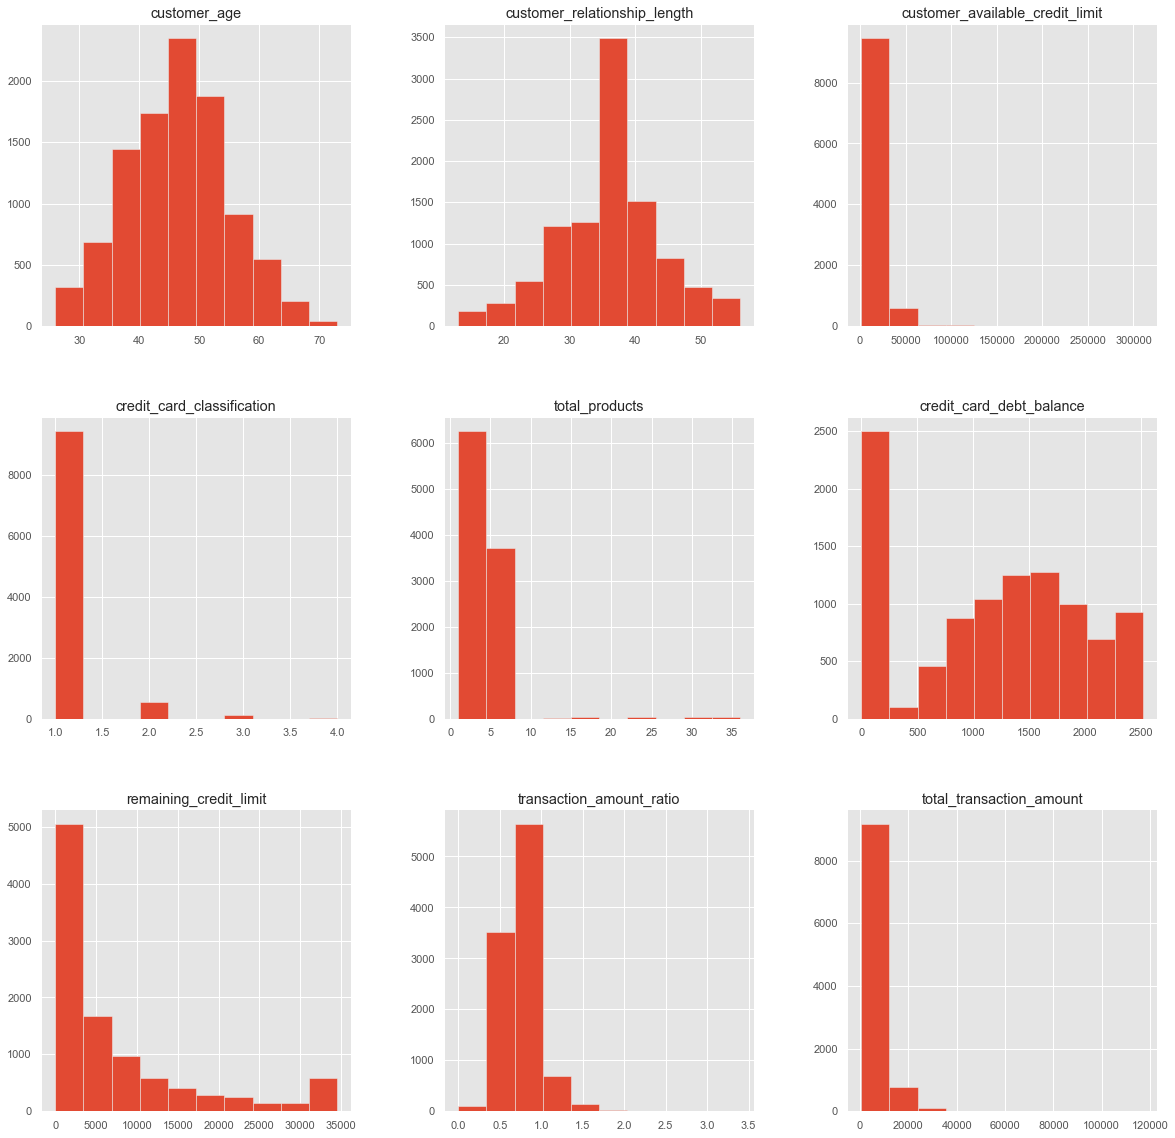

In [195]:
train_hist = train[['customer_age','customer_relationship_length', 'customer_available_credit_limit', 'credit_card_classification', 'total_products', 'credit_card_debt_balance','remaining_credit_limit' ,'transaction_amount_ratio','total_transaction_amount']]

p = train_hist.hist(figsize = (20,20))

1. customer_available_credit_limit

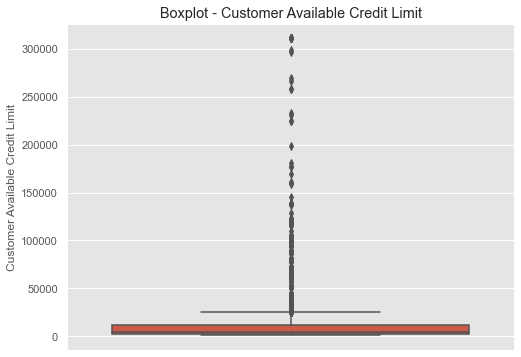

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for customer_available_credit_limit
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, y='customer_available_credit_limit')
plt.title('Boxplot - Customer Available Credit Limit')
plt.ylabel('Customer Available Credit Limit')
plt.show()



In [197]:
# Set the percentile thresholds for winsorization
lower_percentile = 5  # Example: Cap at the 5th percentile
upper_percentile = 85  # Example: Cap at the 95th percentile

# Calculate the percentile values
lower_limit = np.percentile(train['customer_available_credit_limit'], lower_percentile)
upper_limit = np.percentile(train['customer_available_credit_limit'], upper_percentile)

# Apply percentile capping to customer_available_credit_limit in the train dataset
train['customer_available_credit_limit'] = np.clip(train['customer_available_credit_limit'], lower_limit, upper_limit)

# Apply percentile capping to customer_available_credit_limit in the test dataset
test['customer_available_credit_limit'] = np.clip(test['customer_available_credit_limit'], lower_limit, upper_limit)

train.describe().T



,count,mean,std,min,25%,50%,75%,max
customer_id,10127.0,550508.987854,261237.656234,100069.0,323605.000,552548.000,777326.000,999911.000
customer_age,10127.0,46.407129,8.439128,26.0,41.000,46.000,52.000,73.000
customer_sex,10127.0,0.526118,0.499342,0.0,0.000,1.000,1.000,1.000
customer_number_of_dependents,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
customer_education,10127.0,2.486817,0.998418,1.0,2.000,3.000,3.000,4.000
customer_civil_status,10127.0,2.389454,0.660083,1.0,2.000,2.000,3.000,3.000
customer_salary_range,10127.0,2.454725,1.389664,1.0,1.000,2.000,4.000,5.000
customer_relationship_length,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
customer_available_credit_limit,10127.0,7529.661756,6176.547558,1449.0,2578.500,4696.000,11767.500,18825.100
credit_card_classification,10127.0,1.083638,0.333784,1.0,1.000,1.000,1.000,4.000


2. total_transaction_amount

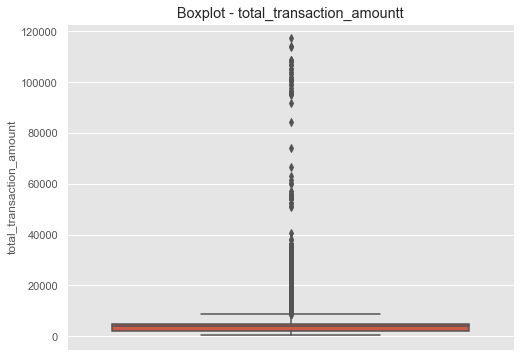

In [198]:
# Create a boxplot for customer_available_credit_limit
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, y='total_transaction_amount')
plt.title('Boxplot - total_transaction_amountt')
plt.ylabel('total_transaction_amount')
plt.show()

In [199]:
# Set the percentile thresholds for winsorization
lower_percentile = 5  # Example: Cap at the 5th percentile
upper_percentile = 85  # Example: Cap at the 95th percentile

# Calculate the percentile values
lower_limit = np.percentile(train['total_transaction_amount'], lower_percentile)
upper_limit = np.percentile(train['total_transaction_amount'], upper_percentile)

# Apply percentile capping to customer_available_credit_limit in the train dataset
train['total_transaction_amount'] = np.clip(train['total_transaction_amount'], lower_limit, upper_limit)

# Apply percentile capping to customer_available_credit_limit in the test dataset
test['total_transaction_amount'] = np.clip(test['total_transaction_amount'], lower_limit, upper_limit)

train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10127.0,550508.987854,261237.656234,100069.0,323605.000,552548.000,777326.000,999911.000
customer_age,10127.0,46.407129,8.439128,26.0,41.000,46.000,52.000,73.000
customer_sex,10127.0,0.526118,0.499342,0.0,0.000,1.000,1.000,1.000
customer_number_of_dependents,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
customer_education,10127.0,2.486817,0.998418,1.0,2.000,3.000,3.000,4.000
customer_civil_status,10127.0,2.389454,0.660083,1.0,2.000,2.000,3.000,3.000
customer_salary_range,10127.0,2.454725,1.389664,1.0,1.000,2.000,4.000,5.000
customer_relationship_length,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
customer_available_credit_limit,10127.0,7529.661756,6176.547558,1449.0,2578.500,4696.000,11767.500,18825.100
credit_card_classification,10127.0,1.083638,0.333784,1.0,1.000,1.000,1.000,4.000


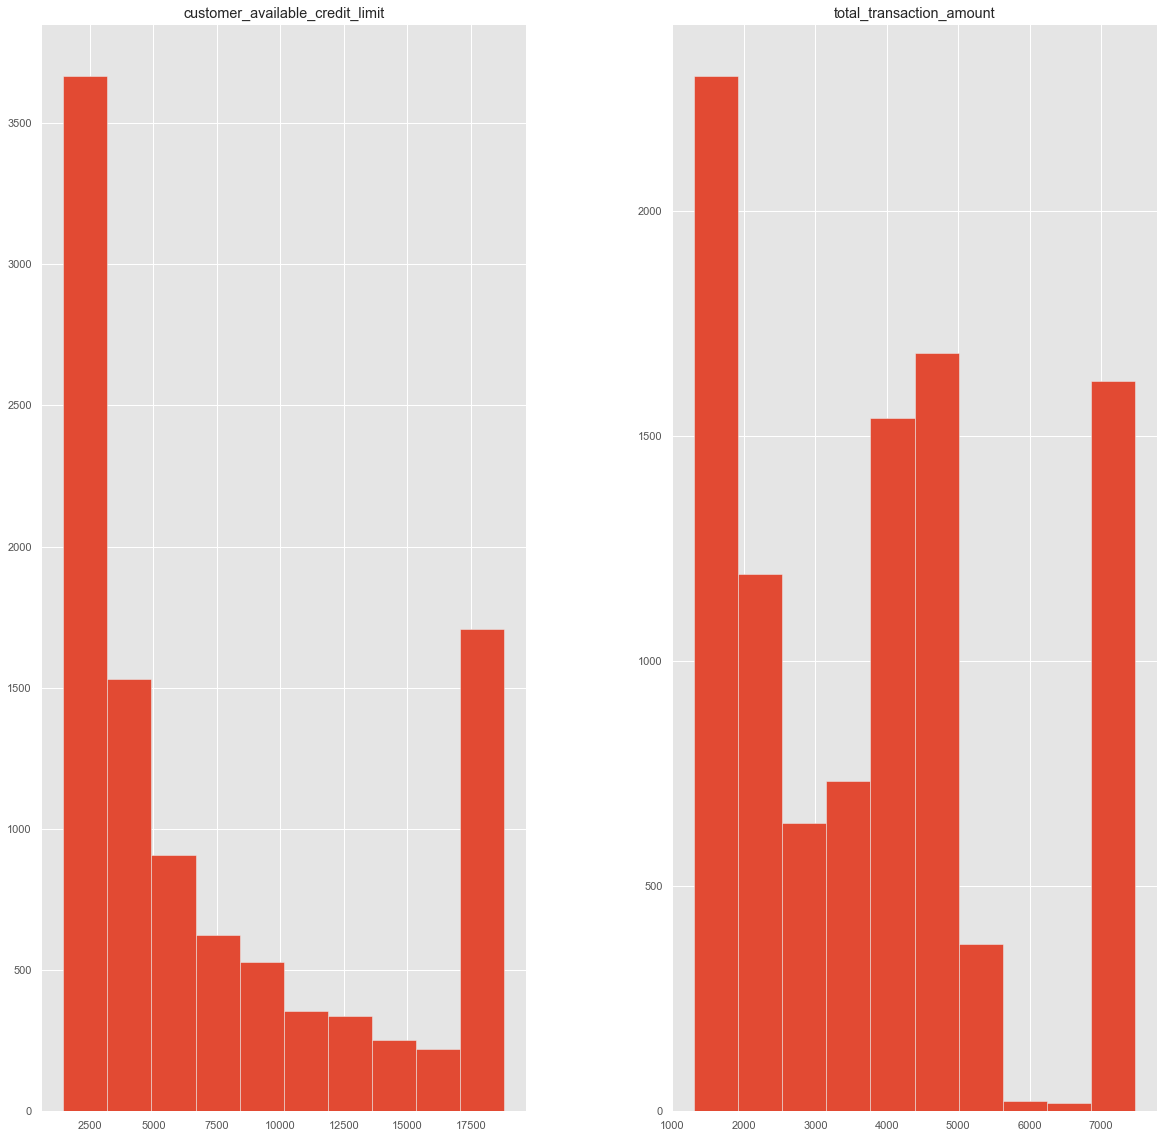

In [200]:
train_hist = train[['customer_available_credit_limit', 'total_transaction_amount']]

p = train_hist.hist(figsize = (20,20))

## Feature scaling and selection

1. Correlation

In [201]:
# Find correlation with the target and sort
correlations = train.corr()['account_status'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Postive Correlations:
 customer_id              0.019904
customer_sex             0.032316
period_inactive          0.152449
contacts_in_last_year    0.204491
account_status           1.000000
Name: account_status, dtype: float64

Most Negative Correlations:
 total_transaction_count           -0.371403
credit_card_debt_balance          -0.263053
average_utilization               -0.178410
total_transaction_amount          -0.171955
transaction_amount_ratio          -0.131063
transaction_count_ratio           -0.120838
total_products                    -0.079548
customer_available_credit_limit   -0.032287
customer_civil_status             -0.015743
customer_salary_range             -0.004032
Name: account_status, dtype: float64


Positive: period_inactive, contacts_in_last_year
#
Negative: total_products, transaction_count_ratio, transaction_amount_ratio, total_transaction_amount,
        average_utilization, credit_card_debt_balance, total_transaction_count

In [202]:
train_selected = train[['account_status', 'period_inactive', 'contacts_in_last_year', 'total_products', 'transaction_count_ratio','transaction_amount_ratio','total_transaction_amount','average_utilization','credit_card_debt_balance','total_transaction_count']]

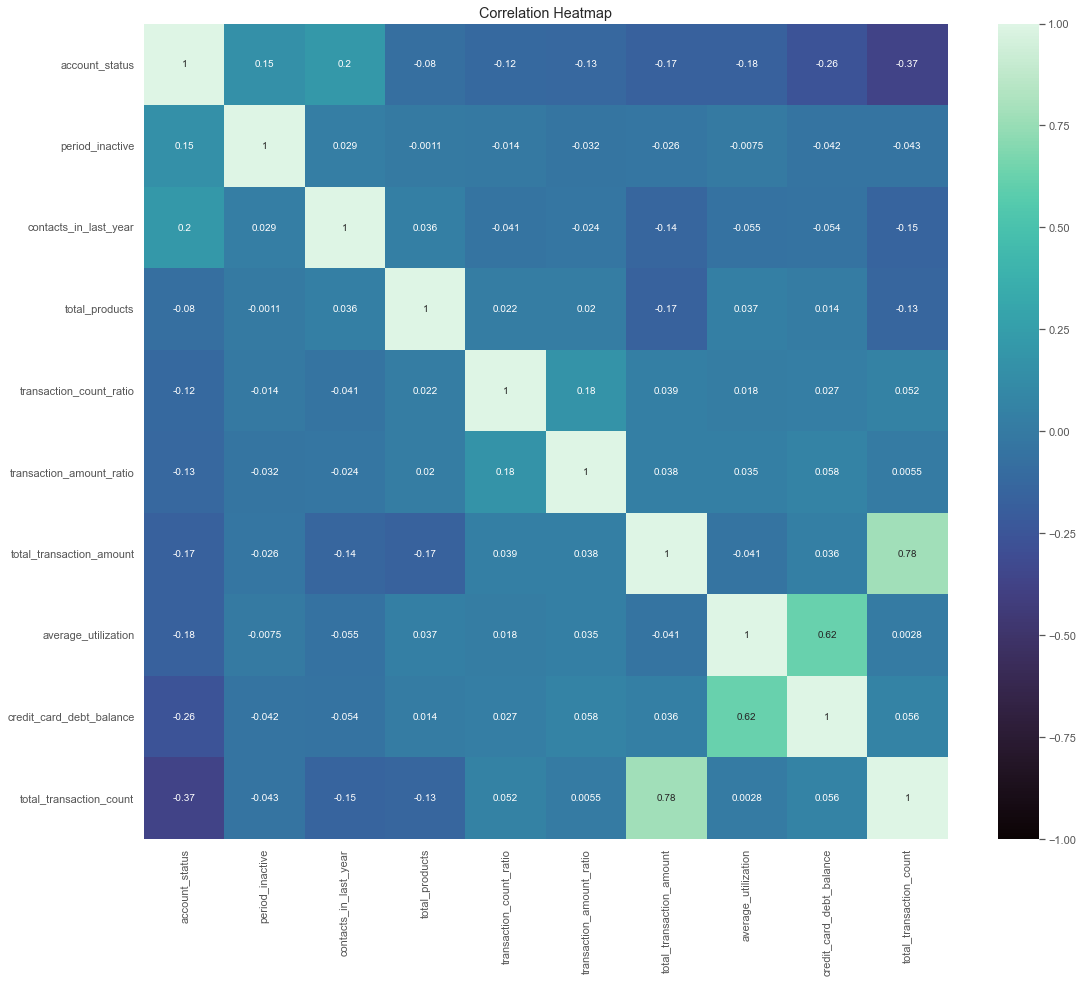

In [203]:
corr = train_selected.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

train_pairplot = train[['account_status', 'credit_card_debt_balance', 'total_transaction_count' ]]

We observe >0.2 correlation with total_transaction_count and credit_card_debt_balance

2. Pairplot

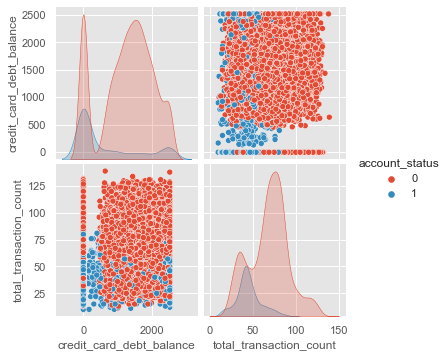

In [204]:
sns.pairplot(train_pairplot, hue = 'account_status')

### Scaling

In [205]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(train.drop(["account_status"], axis=1)), columns=train.drop(["account_status"], axis=1).columns)

X.head(10)

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization
0,0.784386,-0.996257,0.949059,-0.266547,-0.487613,0.924999,-0.327236,-0.617129,-0.961209,-0.250587,-0.046282,-0.337598,1.396424,-0.088121,-0.766442,0.502105,0.136815,0.091230,-0.160588,1.487629
1,0.067314,-0.048245,0.949059,-0.266547,0.514021,-0.590037,-1.046869,0.509840,-0.155703,-0.250587,0.267856,-0.337598,-0.411616,-1.426858,-0.099133,-3.006172,-1.196362,-1.357340,-0.960748,-0.997155
2,0.171806,-0.403750,-1.053675,-1.036462,-0.487613,0.924999,1.112032,-0.742348,1.828853,2.745506,-0.988694,-1.327136,0.492404,1.082507,2.750408,-0.775291,0.108924,-0.462635,-0.639716,-0.783137
3,-1.007780,-0.048245,0.949059,1.273283,-0.487613,0.924999,-1.046869,0.008965,-0.834757,-0.250587,0.267856,-0.337598,-1.315636,0.207604,-0.707038,-0.337327,0.196146,0.687701,0.107208,1.037829
4,-1.219670,-0.759254,-1.053675,1.273283,-0.487613,-0.590037,1.112032,-0.867567,0.882144,-0.250587,-0.360419,0.651940,-0.411616,-1.426858,0.606019,-0.601930,1.831151,0.858121,-0.189626,-0.997155
5,-0.504118,0.544262,-1.053675,1.273283,-0.487613,0.924999,1.112032,0.760277,1.118534,-0.250587,0.581993,-1.327136,-0.411616,1.661686,0.489741,0.424549,-0.900720,-0.760870,0.100755,-0.365984
6,1.323297,-0.166747,0.949059,0.503368,-1.489247,-0.590037,-1.046869,0.384621,-0.806099,-0.250587,0.267856,1.641478,-1.315636,1.337738,-0.788884,-0.328202,-1.023947,-0.079190,0.147539,2.205859
7,-1.117865,0.425761,0.949059,-1.036462,-0.487613,-0.590037,-1.046869,0.008965,-0.487782,-0.250587,-0.988694,-1.327136,0.492404,1.319332,-0.570958,-0.615617,0.415722,0.687701,-0.091219,0.798419
8,1.267916,-0.166747,0.949059,2.043199,-1.489247,0.924999,0.392398,0.509840,1.165488,-0.250587,-0.360419,-0.337598,-0.411616,-1.426858,0.798534,-0.236960,0.402537,0.858121,-0.133163,-0.997155
9,-0.701534,-0.759254,0.949059,-0.266547,0.514021,-0.590037,-1.046869,-0.867567,-0.792336,-0.250587,0.267856,-1.327136,-0.411616,0.969616,-0.746531,0.711963,0.363997,0.219045,-0.365468,1.690765


In [206]:
X = train.drop(["customer_id"], axis=1)

# KNN

1. Split to target and explaining variables

I am going to choose the numer of k based on train split, where X is already defined and standardized an Y needs to be extracted from the train data base.

In [207]:
Y = train.account_status

In [208]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3,random_state=42, stratify=Y)

In [209]:
X_train = X_train.drop(['account_status'], axis = 1)
X_test = X_test.drop(['account_status'], axis = 1)

In [210]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)
    
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))


Max test score 88.35900473933648 % and k = [13]


In [211]:
train_scores

[1.0,
 0.9203081025033328,
 0.9231225003703155,
 0.9084580062213006,
 0.9090505110354021,
 0.9017923270626574,
 0.9007554436379795,
 0.8961635313286921,
 0.8972004147533699,
 0.8903866093912013,
 0.8929047548511332,
 0.8897941045770997,
 0.892460376240557,
 0.8889053473559473]

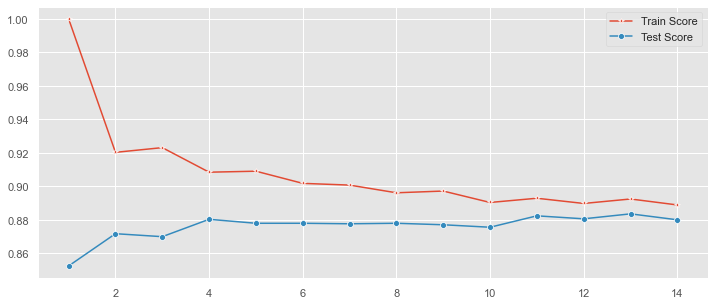

In [212]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best score has been captured for k = 13

#
#
## Model training
train.fit trains the classifier and train.score calculates the accuracy. Importantly, the X_test and Y_test is the validation sample.

In [213]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.8835900473933649

# Model performance analysis

### 1. Confusion matrix

![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)

In [214]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier (knn) we had fit above
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test,Y_pred)
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2706,128,2834
1,265,277,542
All,2971,405,3376


Text(0.5, 12.5, 'Predicted label')

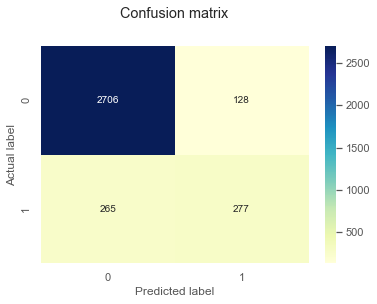

In [215]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report

In [216]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2834
           1       0.68      0.51      0.59       542

    accuracy                           0.88      3376
   macro avg       0.80      0.73      0.76      3376
weighted avg       0.87      0.88      0.88      3376



# ROC - AUC

In [217]:
from sklearn.metrics import roc_curve
Y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

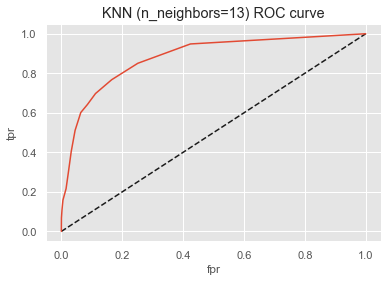

In [218]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN (n_neighbors=13) ROC curve')
plt.show()

In [219]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_proba)

0.8801926136763132

A value of 0.88 might indicate a reasonably good performance of the model, as it is significantly better than random guessing. 

#

# Hyper parameter optimization

In [220]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8818993089832181
Best Parameters: {'n_neighbors': 15}


In [221]:
#Setup a knn classifier with 15 neighbors
knn = KNeighborsClassifier(15)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.8832938388625592

In [222]:
#let us get the predictions using the classifier (knn) we had fit above
Y_pred_T = knn.predict(X_test)
confusion_matrix(Y_test,Y_pred_T)
pd.crosstab(Y_test, Y_pred_T, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2705,129,2834
1,265,277,542
All,2970,406,3376


Text(0.5, 12.5, 'Predicted label')

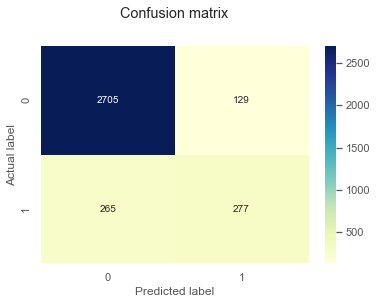

In [223]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_T)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [224]:
print(classification_report(Y_test,Y_pred_T))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2834
           1       0.68      0.51      0.58       542

    accuracy                           0.88      3376
   macro avg       0.80      0.73      0.76      3376
weighted avg       0.87      0.88      0.88      3376



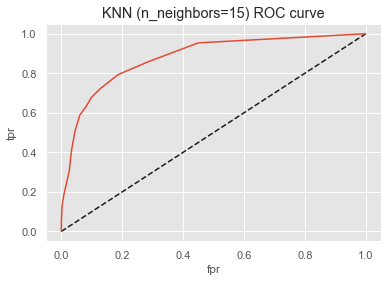

In [225]:
Y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN (n_neighbors=15) ROC curve')
plt.show()

In [226]:
roc_auc_score(Y_test, Y_pred_proba)

0.8789644459606204

# Conclusion

In [227]:
test_knn = test.drop(['customer_id'], axis=1)

In [228]:
test_knn.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,5063.0,46.128185,7.177187,26.000000,41.000000,46.000000,51.000000,72.000000
customer_sex,5063.0,0.599052,0.490139,0.000000,0.000000,1.000000,1.000000,1.000000
customer_number_of_dependents,5063.0,1.951412,1.060595,0.000000,1.000000,2.000000,3.000000,5.000000
customer_education,5063.0,2.507407,0.927804,1.000000,2.000000,3.000000,3.000000,4.000000
customer_civil_status,5063.0,2.523800,0.552799,1.000000,2.000000,3.000000,3.000000,3.000000
customer_salary_range,5063.0,2.036342,1.287059,1.000000,1.000000,1.000000,3.000000,5.000000
customer_relationship_length,5063.0,35.593917,6.664137,13.000000,32.000000,36.000000,39.000000,55.000000
customer_available_credit_limit,5063.0,7381.328198,5693.059331,1449.000000,2935.043502,4987.448850,10411.841565,18825.100000
credit_card_classification,5063.0,1.006715,0.084064,1.000000,1.000000,1.000000,1.000000,3.000000
total_products,5063.0,4.055303,4.664918,1.000000,3.000000,3.000000,4.000000,54.000000


In [229]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,6751.0,46.327803,8.486674,26.0,41.0000,46.000,52.000,73.000
customer_sex,6751.0,0.518738,0.499686,0.0,0.0000,1.000,1.000,1.000
customer_number_of_dependents,6751.0,2.350911,1.295902,0.0,1.0000,2.000,3.000,5.000
customer_education,6751.0,2.490446,0.999491,1.0,2.0000,3.000,3.000,4.000
customer_civil_status,6751.0,2.387794,0.654416,1.0,2.0000,2.000,3.000,3.000
customer_salary_range,6751.0,2.446156,1.376640,1.0,1.0000,2.000,4.000,5.000
customer_relationship_length,6751.0,35.818397,7.988059,13.0,31.0000,36.000,40.000,56.000
customer_available_credit_limit,6751.0,7575.851474,6183.214775,1449.0,2601.0000,4710.000,11960.500,18825.100
credit_card_classification,6751.0,1.083988,0.331412,1.0,1.0000,1.000,1.000,4.000
total_products,6751.0,4.181751,3.384846,1.0,3.0000,4.000,5.000,36.000


In [230]:
account_status_knn = knn.predict(test_knn)

In [231]:
test_knn['account_status_knn'] = account_status_knn

0    4648
1     415
Name: account_status_knn, dtype: int64


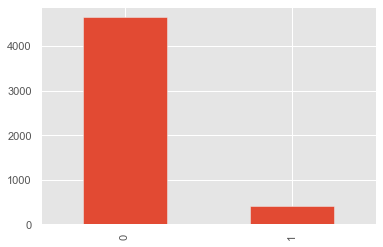

In [235]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = test_knn["account_status_knn"].map(lambda x: color_wheel.get(x + 1))
print(test_knn.account_status_knn.value_counts())
p=test_knn.account_status_knn.value_counts().plot(kind="bar")

In [236]:
# view the percentage distribution of target_class column

test_knn['account_status_knn'].value_counts()/np.float(len(test))

0    0.918033
1    0.081967
Name: account_status_knn, dtype: float64

We observe high difference between svn and knn output, which leads us to the conclusion that svn might me overfitted. Let's compare the test and train databases.

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10127.0,550508.987854,261237.656234,100069.0,323605.000,552548.000,777326.000,999911.000
customer_age,10127.0,46.504493,8.510241,26.0,41.000,46.000,52.000,73.000
customer_sex,10127.0,0.527106,0.499289,0.0,0.000,1.000,1.000,1.000
customer_number_of_dependents,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
customer_education,10127.0,2.480103,0.993746,1.0,2.000,3.000,3.000,4.000
customer_civil_status,10127.0,2.388763,0.658019,1.0,2.000,2.000,3.000,3.000
customer_salary_range,10127.0,2.461341,1.393625,1.0,1.000,2.000,4.000,5.000
customer_relationship_length,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
customer_available_credit_limit,10127.0,7529.661756,6176.547558,1449.0,2578.500,4696.000,11767.500,18825.100
credit_card_classification,10127.0,1.083638,0.333784,1.0,1.000,1.000,1.000,4.000


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,5063.0,554624.784910,259753.736563,100163.000000,326746.500000,557332.000000,779934.000000,999857.000000
customer_age,5063.0,46.114754,7.179286,26.000000,41.000000,46.000000,51.000000,72.000000
customer_sex,5063.0,0.596484,0.490651,0.000000,0.000000,1.000000,1.000000,1.000000
customer_number_of_dependents,5063.0,1.951412,1.060595,0.000000,1.000000,2.000000,3.000000,5.000000
customer_education,5063.0,2.516690,0.928322,1.000000,2.000000,3.000000,3.000000,4.000000
customer_civil_status,5063.0,2.522418,0.553928,1.000000,2.000000,3.000000,3.000000,3.000000
customer_salary_range,5063.0,2.035355,1.289464,1.000000,1.000000,1.000000,3.000000,5.000000
customer_relationship_length,5063.0,35.593917,6.664137,13.000000,32.000000,36.000000,39.000000,55.000000
customer_available_credit_limit,5063.0,7381.328198,5693.059331,1449.000000,2935.043502,4987.448850,10411.841565,18825.100000
credit_card_classification,5063.0,1.006715,0.084064,1.000000,1.000000,1.000000,1.000000,3.000000


Looking at the distributions, test and train data seems to be comparable. Thus, the conclusion is svm model was overfitted and knn is most appropriate.

Final check

In [238]:
# view the percentage distribution of target_class column

test_knn['account_status_knn'].value_counts()/np.float(len(test))

0    0.918033
1    0.081967
Name: account_status_knn, dtype: float64

Correct, save to csv.

In [239]:
# Save the test database with predicted account_status to a CSV file
test_knn.to_csv('predicted_account_status.csv', index=False)

# Comments

Some of the columns in the script are commented for memory effectiveness. 